In [9]:
import scipy
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, signal
from IPython.display import Audio

In [184]:
fs = 16128
audio = librosa.load("../gtzan.keras/data/Dire_Straits.wav")

In [173]:
auSign = audio[0]
auSign = signal.resample(auSign, int(fs*len(auSign)/audio[1]))
Audio(auSign, rate=fs)

/home/badrdr/.conda/envs/tf/lib/python3.6/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/badrdr/.conda/envs/tf/lib/python3.6/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/badrdr/.conda/envs/tf/lib/python3.6/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

In [174]:
xshape = auSign.shape[0]
chunk = int(fs*1.5)
for i in range(0,xshape, chunk):
    print(auSign[i:i+chunk].shape)
print(len(range(0,xshape, chunk)))

(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
(24192,)
20


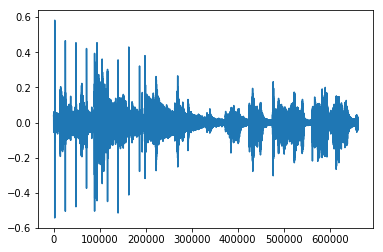

In [166]:
plt.plot(audio[0])

In [186]:
x = auSign[:24192]
nperseg = 256
overlap = nperseg//2
print(nperseg - overlap)
nfft = nperseg
nBins = nfft//2 + 1

print("Number of bins : {}".format(nBins))

f, t, Zxx = scipy.signal.stft(x, fs=fs, nperseg=nperseg)
print("Shape of stft : {}".format(Zxx.shape))
print("Shape of x : {}".format(x.shape))

step = nperseg - overlap
lengthOfStft = (x.shape[0]+nperseg-overlap)//step + 1
print("legnth of stft : {}".format(lengthOfStft))

128
Number of bins : 129
Shape of stft : (129, 190)
Shape of x : (24192,)
legnth of stft : 191


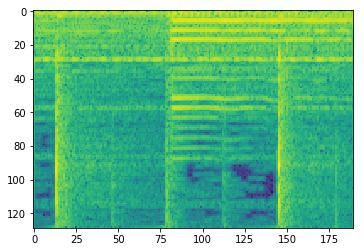

In [176]:
norm = np.abs(Zxx)
plt.imshow(20*np.log(norm))

(128, 190)


/home/badrdr/.conda/envs/tf/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


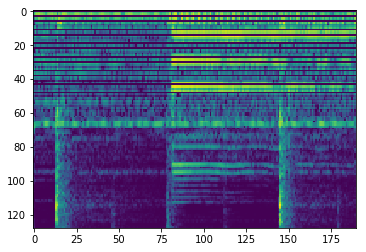

In [187]:
normLibrosa = librosa.feature.melspectrogram(x, sr=fs, n_fft=nperseg, hop_length=overlap)
print(normLibrosa.shape)
plt.imshow(20*np.log(normLibrosa+ 1e-5))

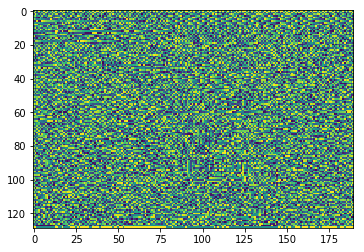

In [178]:
phase = np.angle(Zxx)
plt.imshow(phase)

Here we inverse transform to see how the sound is affected

In [89]:
t2, iStft = scipy.signal.istft(Zxx, fs=audio[1], nperseg=nperseg)
Audio(iStft, rate=audio[1])

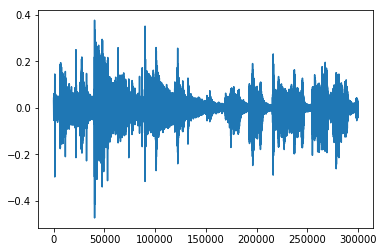

In [69]:
plt.plot(iStft)

In [70]:
np.linalg.norm(iStft[:audio[0].shape[0]]-audio[0])

ValueError: operands could not be broadcast together with shapes (300032,) (600000,) 

Here we inverse transform with phase and norm seperated to see how the sound is affected

In [ ]:
Zxx2 = norm*np.exp(phase*1j)
t3, iStft2 = scipy.signal.istft(Zxx2, fs=audio[1], nperseg=1024)
Audio(iStft2, rate=audio[1])

In [ ]:
np.stack([norm, phase], axis=-1).shape

In [ ]:
audio[1]